In [1]:
df = pd.read_csv('fccs_summary.csv')

In [115]:
df.columns.values

array(['Filename', 'Fuelbed_number', 'Fuelbed_name', 'Benchmark_ROS',
       'Benchmark_FL', 'Benchmark_RI', 'Benchmark_RI_Shrub',
       'Benchmark_RI_Herb', 'Benchmark_RI_Wood', 'Benchmark_RI_LLM',
       'Crosswalk13', 'ROS%13', 'FL%13', 'Crosswalk40', 'ROS%40', 'FL%40',
       'Custom_ROS', 'Custom_FL', 'Custom_RI', 'Custom_RI_Shrub',
       'Custom_RI_Herb', 'Custom_RI_Wood', 'Custom_RI_LLM',
       'Custom_Crosswalk13', 'Custom_ROS%13', 'Custom_FL%13',
       'Custom_Crosswalk40', 'Custom_ROS%40', 'Custom_FL%40', 'FCC_Code',
       'Surface_fire_potential', 'Reaction_potential', 'Spread_potential',
       'Flamelength_potential', 'Crown_fire_potential',
       'Crown_initiation_potential', 'Crown-crown_trans_potential',
       'Crownfire_spread_potential', 'Available_fuel_potential',
       'Flame_available_potential', 'Smolder_available_potential',
       'Residual_smolder_potential', 'Depth_shrub', 'Depth_herb',
       'Depth_woody', 'Depth_LLM', 'Depth_surface_fuels',
       '

In [128]:
list(range(16,29))

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

In [129]:
cols_values = df.columns.values
cols_values = np.delete(cols_values, [0,1,2,16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,len(cols_values)-1])
cols_values

array(['Benchmark_ROS', 'Benchmark_FL', 'Benchmark_RI',
       'Benchmark_RI_Shrub', 'Benchmark_RI_Herb', 'Benchmark_RI_Wood',
       'Benchmark_RI_LLM', 'Crosswalk13', 'ROS%13', 'FL%13', 'Crosswalk40',
       'ROS%40', 'FL%40', 'FCC_Code', 'Surface_fire_potential',
       'Reaction_potential', 'Spread_potential', 'Flamelength_potential',
       'Crown_fire_potential', 'Crown_initiation_potential',
       'Crown-crown_trans_potential', 'Crownfire_spread_potential',
       'Available_fuel_potential', 'Flame_available_potential',
       'Smolder_available_potential', 'Residual_smolder_potential',
       'Depth_shrub', 'Depth_herb', 'Depth_woody', 'Depth_LLM',
       'Depth_surface_fuels', 'PercentCover_shrub', 'PercentCover_herb',
       'PercentCover_woody', 'PercentCover_LLM', 'Tree_over_crown_load',
       'Tree_mid_crown_load', 'Tree_under_crown_load',
       'Tree_aboveground_load', 'Snag_class1_foliage_crown_load',
       'Snag_class1_wood_load', 'Snag_class1_aboveground_load',
   

In [27]:
import re
fire_ts1_all_sev = [True if j else False for j in (re.match('\d+_1.1$', i) for i in df.Fuelbed_number)]

In [35]:
dfire = df.loc[fire_ts1_all_sev]
len(dfire)

1167

In [158]:
gb = dfire.groupby(by=dfire.Fuelbed_number.apply(lambda x: x.split('_')[0]))
df_means = pd.DataFrame()
for c in cols_values: 
    s1 = gb.nth([0]).get(c).mean().round(2)
    s2 = gb.nth([1]).get(c).mean().round(2)
    s3 = gb.nth([2]).get(c).mean().round(2)
    arrow = '='    # equals
    if s1 > s2 and s2 > s3:
        arrow = '&darr;'
        #arrow = '↓'
    if s1 < s2 and s2 < s3:
        arrow = '&uarr;'
        #arrow = '↑'
        
    line = '{},{},{},{},{}'.format(arrow, c, s1, s2, s3)
    #print(line)
    df_means = df_means.append({'Trend':arrow, 'Name':c, 'S1_mean':s1, 'S2_mean':s2, 'S3_mean':s3}, ignore_index=True)

df_means = df_means[['Trend','Name','S1_mean','S2_mean','S3_mean']]
from IPython.display import display, HTML
df_means.to_html('means.html', index=False, escape=False)

In [74]:
for g in gb.groups:
    for i in range(3):
        print(gb.get_group(g).iloc[i][['Fuelbed_number', 'Total_aboveground_biomass']].reset_index())
    print('----------')

                       index     7776
0             Fuelbed_number  239_111
1  Total_aboveground_biomass  351.747
                       index     7779
0             Fuelbed_number  239_121
1  Total_aboveground_biomass  511.428
                       index     7782
0             Fuelbed_number  239_131
1  Total_aboveground_biomass  702.516
----------
                       index    10737
0             Fuelbed_number  341_111
1  Total_aboveground_biomass  16.1852
                       index    10740
0             Fuelbed_number  341_121
1  Total_aboveground_biomass   2.2009
                       index    10743
0             Fuelbed_number  341_131
1  Total_aboveground_biomass   0.1706
----------
                       index     8892
0             Fuelbed_number  284_111
1  Total_aboveground_biomass  211.629
                       index     8895
0             Fuelbed_number  284_121
1  Total_aboveground_biomass  316.606
                       index     8898
0             Fuelbed_number

                       index     6396
0             Fuelbed_number  191_131
1  Total_aboveground_biomass  40.0315
----------
                       index      747
0             Fuelbed_number   17_111
1  Total_aboveground_biomass  200.578
                       index      750
0             Fuelbed_number   17_121
1  Total_aboveground_biomass  140.862
                       index      753
0             Fuelbed_number   17_131
1  Total_aboveground_biomass  91.6164
----------
                       index     4473
0             Fuelbed_number  121_111
1  Total_aboveground_biomass  131.909
                       index     4476
0             Fuelbed_number  121_121
1  Total_aboveground_biomass  120.576
                       index     4479
0             Fuelbed_number  121_131
1  Total_aboveground_biomass  117.483
----------
                       index    11619
0             Fuelbed_number  403_111
1  Total_aboveground_biomass  10.0314
                       index    11622
0             Fue

                       index     4308
0             Fuelbed_number  110_131
1  Total_aboveground_biomass  214.776
----------
                       index     9531
0             Fuelbed_number  310_111
1  Total_aboveground_biomass   1.2824
                       index     9534
0             Fuelbed_number  310_121
1  Total_aboveground_biomass   0.6259
                       index     9537
0             Fuelbed_number  310_131
1  Total_aboveground_biomass    0.124
----------
                       index     5985
0             Fuelbed_number  182_111
1  Total_aboveground_biomass  51.5754
                       index     5988
0             Fuelbed_number  182_121
1  Total_aboveground_biomass   41.993
                       index     5991
0             Fuelbed_number  182_131
1  Total_aboveground_biomass  40.1797
----------
                       index     1566
0             Fuelbed_number   38_111
1  Total_aboveground_biomass  247.982
                       index     1569
0             Fue

                       index    12456
0             Fuelbed_number  424_111
1  Total_aboveground_biomass  132.661
                       index    12459
0             Fuelbed_number  424_121
1  Total_aboveground_biomass  131.119
                       index    12462
0             Fuelbed_number  424_131
1  Total_aboveground_biomass  136.798
----------
                       index    2520
0             Fuelbed_number  62_111
1  Total_aboveground_biomass  1.4153
                       index    2523
0             Fuelbed_number  62_121
1  Total_aboveground_biomass  0.6537
                       index    2526
0             Fuelbed_number  62_131
1  Total_aboveground_biomass  0.1259
----------
                       index    10845
0             Fuelbed_number  344_111
1  Total_aboveground_biomass   0.9569
                       index    10848
0             Fuelbed_number  344_121
1  Total_aboveground_biomass   0.4394
                       index    10851
0             Fuelbed_number  344_131

                       index     3762
0             Fuelbed_number   95_111
1  Total_aboveground_biomass  12.7294
                       index    3765
0             Fuelbed_number  95_121
1  Total_aboveground_biomass  2.4744
                       index    3768
0             Fuelbed_number  95_131
1  Total_aboveground_biomass   0.574
----------
                       index    11106
0             Fuelbed_number  351_111
1  Total_aboveground_biomass  62.9366
                       index    11109
0             Fuelbed_number  351_121
1  Total_aboveground_biomass   7.4874
                       index    11112
0             Fuelbed_number  351_131
1  Total_aboveground_biomass   0.4006
----------
                       index     7200
0             Fuelbed_number  225_111
1  Total_aboveground_biomass  55.6658
                       index     7203
0             Fuelbed_number  225_121
1  Total_aboveground_biomass  51.6547
                       index     7206
0             Fuelbed_number  225_

1  Total_aboveground_biomass  256.995
                       index      300
0             Fuelbed_number    7_121
1  Total_aboveground_biomass  347.522
                       index      303
0             Fuelbed_number    7_131
1  Total_aboveground_biomass  457.858
----------
                       index    2592
0             Fuelbed_number  65_111
1  Total_aboveground_biomass  1.8872
                       index    2595
0             Fuelbed_number  65_121
1  Total_aboveground_biomass  0.5597
                       index    2598
0             Fuelbed_number  65_131
1  Total_aboveground_biomass  0.0944
----------
                       index    13050
0             Fuelbed_number  438_111
1  Total_aboveground_biomass  143.231
                       index    13053
0             Fuelbed_number  438_121
1  Total_aboveground_biomass  123.036
                       index    13056
0             Fuelbed_number  438_131
1  Total_aboveground_biomass  126.061
----------
                       ind

                       index     1248
0             Fuelbed_number   28_131
1  Total_aboveground_biomass  119.887
----------
                       index     9378
0             Fuelbed_number  306_111
1  Total_aboveground_biomass  165.306
                       index     9381
0             Fuelbed_number  306_121
1  Total_aboveground_biomass  262.963
                       index     9384
0             Fuelbed_number  306_131
1  Total_aboveground_biomass  380.509
----------
                       index    14076
0             Fuelbed_number  466_111
1  Total_aboveground_biomass  205.228
                       index    14079
0             Fuelbed_number  466_121
1  Total_aboveground_biomass  220.244
                       index    14082
0             Fuelbed_number  466_131
1  Total_aboveground_biomass  239.106
----------
                       index    10629
0             Fuelbed_number  338_111
1  Total_aboveground_biomass   3.5323
                       index    10632
0             Fue

1  Total_aboveground_biomass  98.5341
                       index     9969
0             Fuelbed_number  321_131
1  Total_aboveground_biomass  92.0286
----------
                       index     15777
0             Fuelbed_number  1296_111
1  Total_aboveground_biomass    0.6255
                       index     15780
0             Fuelbed_number  1296_121
1  Total_aboveground_biomass    0.1492
                       index     15783
0             Fuelbed_number  1296_131
1  Total_aboveground_biomass    0.0224
----------
                       index    13635
0             Fuelbed_number  456_111
1  Total_aboveground_biomass  334.174
                       index    13638
0             Fuelbed_number  456_121
1  Total_aboveground_biomass  327.161
                       index    13641
0             Fuelbed_number  456_131
1  Total_aboveground_biomass  324.459
----------
                       index    13374
0             Fuelbed_number  449_111
1  Total_aboveground_biomass  161.154
        

                       index     1485
0             Fuelbed_number   36_111
1  Total_aboveground_biomass  42.4777
                       index     1488
0             Fuelbed_number   36_121
1  Total_aboveground_biomass  38.8121
                       index     1491
0             Fuelbed_number   36_131
1  Total_aboveground_biomass  36.8301
----------
                       index     3582
0             Fuelbed_number   91_111
1  Total_aboveground_biomass  66.5628
                       index     3585
0             Fuelbed_number   91_121
1  Total_aboveground_biomass  39.4003
                       index    3588
0             Fuelbed_number  91_131
1  Total_aboveground_biomass  35.193
----------
                       index    2313
0             Fuelbed_number  57_111
1  Total_aboveground_biomass  0.0696
                       index    2316
0             Fuelbed_number  57_121
1  Total_aboveground_biomass  0.0291
                       index    2319
0             Fuelbed_number  57_131
1

1  Total_aboveground_biomass  19.1225
                       index    11541
0             Fuelbed_number  401_121
1  Total_aboveground_biomass   9.0816
                       index    11544
0             Fuelbed_number  401_131
1  Total_aboveground_biomass   4.6975
----------
                       index      387
0             Fuelbed_number    9_111
1  Total_aboveground_biomass  93.4249
                       index      390
0             Fuelbed_number    9_121
1  Total_aboveground_biomass  76.9967
                       index      393
0             Fuelbed_number    9_131
1  Total_aboveground_biomass  62.4514
----------
                       index    10665
0             Fuelbed_number  339_111
1  Total_aboveground_biomass    2.817
                       index    10668
0             Fuelbed_number  339_121
1  Total_aboveground_biomass   0.4689
                       index    10671
0             Fuelbed_number  339_131
1  Total_aboveground_biomass   0.0508
----------
                 

                       index     4656
0             Fuelbed_number  129_121
1  Total_aboveground_biomass  138.919
                       index     4659
0             Fuelbed_number  129_131
1  Total_aboveground_biomass  172.216
----------
                       index    11412
0             Fuelbed_number  359_111
1  Total_aboveground_biomass  52.8323
                       index    11415
0             Fuelbed_number  359_121
1  Total_aboveground_biomass   6.5312
                       index    11418
0             Fuelbed_number  359_131
1  Total_aboveground_biomass   0.3971
----------
                       index     1773
0             Fuelbed_number   43_111
1  Total_aboveground_biomass  52.0546
                       index     1776
0             Fuelbed_number   43_121
1  Total_aboveground_biomass  41.7989
                       index     1779
0             Fuelbed_number   43_131
1  Total_aboveground_biomass  33.9371
----------
                       index    10881
0             Fue

1  Total_aboveground_biomass   6.2376
----------
                       index     7857
0             Fuelbed_number  241_111
1  Total_aboveground_biomass  93.6996
                       index     7860
0             Fuelbed_number  241_121
1  Total_aboveground_biomass  90.2391
                       index     7863
0             Fuelbed_number  241_131
1  Total_aboveground_biomass  88.4243
----------
                       index     3906
0             Fuelbed_number  100_111
1  Total_aboveground_biomass   7.3888
                       index     3909
0             Fuelbed_number  100_121
1  Total_aboveground_biomass   1.5988
                       index     3912
0             Fuelbed_number  100_131
1  Total_aboveground_biomass    0.224
----------
                       index     9720
0             Fuelbed_number  315_111
1  Total_aboveground_biomass   1.8619
                       index     9723
0             Fuelbed_number  315_121
1  Total_aboveground_biomass   0.4694
                 

----------
                       index      477
0             Fuelbed_number   11_111
1  Total_aboveground_biomass  167.543
                       index     480
0             Fuelbed_number  11_121
1  Total_aboveground_biomass  118.25
                       index      483
0             Fuelbed_number   11_131
1  Total_aboveground_biomass  65.1371
----------
                       index     4842
0             Fuelbed_number  138_111
1  Total_aboveground_biomass   118.97
                       index     4845
0             Fuelbed_number  138_121
1  Total_aboveground_biomass  123.631
                       index     4848
0             Fuelbed_number  138_131
1  Total_aboveground_biomass  134.384
----------
                       index     8541
0             Fuelbed_number  274_111
1  Total_aboveground_biomass  148.335
                       index     8544
0             Fuelbed_number  274_121
1  Total_aboveground_biomass  191.729
                       index     8547
0             Fuelbe

In [89]:
df_out = pd.DataFrame()
sgroups = sorted([int(i) for i in gb.groups])
for g in sgroups:
    df_out = df_out.append(gb.get_group(str(g))[['Fuelbed_number','Fuelbed_name', 'Benchmark_ROS','Total_aboveground_biomass']])
    print(gb.get_group(str(g))[['Fuelbed_number','Fuelbed_name', 'Benchmark_ROS','Total_aboveground_biomass']].to_string(index=False))
    print('----------')
df_out.to_csv('fire_ros_biomass.csv', index=False)

Fuelbed_number Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
        0_111  Bare Ground            0.0                        0.0
        0_121  Bare Ground            0.0                        0.0
        0_131  Bare Ground            0.0                        0.0
----------
Fuelbed_number                                       Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
        1_111  Black cottonwood-Douglas-fir-quaking aspen forest         7.0878                   159.6729
        1_121  Black cottonwood-Douglas-fir-quaking aspen forest         3.9221                   242.0768
        1_131  Black cottonwood-Douglas-fir-quaking aspen forest         0.3487                   347.2587
----------
Fuelbed_number                                       Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
        2_111  Western hemlock-western redcedar-Douglas-fir f...        16.8671                   626.1950
        2_121  Western hemlock-western redcedar-Douglas-f

       73_131  Koa/pukiawe forest         0.3245                    75.7427
----------
Fuelbed_number         Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
       74_111  Mamani-naio savanna         2.0989                    56.3515
       74_121  Mamani-naio savanna         0.6354                    53.7029
       74_131  Mamani-naio savanna         0.0507                    51.8462
----------
Fuelbed_number                          Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
       75_111  Slash pine/New Caledonia pine forest         5.8343                   103.9347
       75_121  Slash pine/New Caledonia pine forest         0.9606                    86.4543
       75_131  Slash pine/New Caledonia pine forest         0.0384                    81.9098
----------
Fuelbed_number                      Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
       76_111  Slash pine/molasses grass forest        17.0417                    73.2794
       76_121  Slash pin

----------
Fuelbed_number                                       Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
      176_111  Smooth cordgrass-black needlerush grassland in...       211.0376                   123.9556
      176_121  Smooth cordgrass-black needlerush grassland in...        49.6226                    14.5506
      176_131  Smooth cordgrass-black needlerush grassland in...         4.4289                     0.7420
----------
Fuelbed_number                                       Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
      178_111  Loblolly-shortleaf pine forest - 10-15 years p...         7.6780                    57.9387
      178_121  Loblolly-shortleaf pine forest - 10-15 years p...         1.7862                    51.1978
      178_131  Loblolly-shortleaf pine forest - 10-15 years p...         0.1551                    50.1913
----------
Fuelbed_number                           Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
      180_111

      282_131  Loblolly pine forest         0.0291                    62.1486
----------
Fuelbed_number                    Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
      283_111  Willow-laurel-water oak forest         5.5969                    98.0959
      283_121  Willow-laurel-water oak forest         6.3760                   134.3922
      283_131  Willow-laurel-water oak forest         0.8582                   177.9371
----------
Fuelbed_number                                       Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
      284_111  Green ash-American elm-silver maple-cottonwood...         1.1672                   211.6292
      284_121  Green ash-American elm-silver maple-cottonwood...         0.1292                   316.6064
      284_131  Green ash-American elm-silver maple-cottonwood...         0.0051                   440.4730
----------
Fuelbed_number                       Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
      286_111  

----------
Fuelbed_number                     Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
      405_111  Northern red oak montane forest         2.7683                    11.7672
      405_121  Northern red oak montane forest         1.7025                     8.4719
      405_131  Northern red oak montane forest         0.2526                     7.3197
----------
Fuelbed_number                                 Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
      406_111  American beech-southern magnolia-oak forest         2.9838                   156.5931
      406_121  American beech-southern magnolia-oak forest         1.1440                   211.3147
      406_131  American beech-southern magnolia-oak forest         0.0333                   281.6624
----------
Fuelbed_number           Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
      407_111  Darlington oak forest         3.2624                   173.3287
      407_121  Darlington oak forest         1

Fuelbed_number                  Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
     1224_111  Wheat field - growing season        32.4415                     1.0705
     1224_121  Wheat field - growing season        11.9080                     0.3717
     1224_131  Wheat field - growing season         1.2476                     0.0669
----------
Fuelbed_number                               Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
     1225_111  Small grains (other) field - post harvest         8.0713                     0.5055
     1225_121  Small grains (other) field - post harvest         2.3655                     0.0892
     1225_131  Small grains (other) field - post harvest         0.2174                     0.0104
----------
Fuelbed_number                                 Fuelbed_name  Benchmark_ROS  Total_aboveground_biomass
     1226_111  Small grains (other) field - growing season        44.8895                     1.6705
     1226_121  Small grains (othe

In [92]:
def eval(group, column):
    retval = 0
    if group.iloc[0].get(column) > group.iloc[1].get(column) \
        and group.iloc[1].get(column) > group.iloc[2].get(column):
            retval = 1
    return retval

def eval_grow(group, column):
    retval = 0
    if group.iloc[2].get(column) > group.iloc[1].get(column) \
        and group.iloc[1].get(column) > group.iloc[0].get(column):
            retval = 1
    return retval
        
x = 0
for g in gb.groups:
    x += eval(gb.get_group(g), 'Total_aboveground_biomass')   
print(x)
        
x = 0
for g in gb.groups:
    x += eval_grow(gb.get_group(g), 'Total_aboveground_biomass')   
print(x)
       

281
76


In [88]:
df_out.head(20)

,Fuelbed_number,Fuelbed_name,Benchmark_ROS,Total_aboveground_biomass
0,0_111,Bare Ground,0.0000,0.0000
3,0_121,Bare Ground,0.0000,0.0000
6,0_131,Bare Ground,0.0000,0.0000
36,1_111,Black cottonwood-Douglas-fir-quaking aspen forest,7.0878,159.6729
39,1_121,Black cottonwood-Douglas-fir-quaking aspen forest,3.9221,242.0768
42,1_131,Black cottonwood-Douglas-fir-quaking aspen forest,0.3487,347.2587
81,2_111,Western hemlock-western redcedar-Douglas-fir f...,16.8671,626.1950
84,2_121,Western hemlock-western redcedar-Douglas-fir f...,9.1703,597.9129
87,2_131,Western hemlock-western redcedar-Douglas-fir f...,0.1186,575.0461
126,3_111,Douglas-fir forest,3.7112,79.9507


In [91]:
x = 0
for g in gb.groups:
    x += eval(gb.get_group(g), 'Benchmark_ROS')
    
print(x)


368


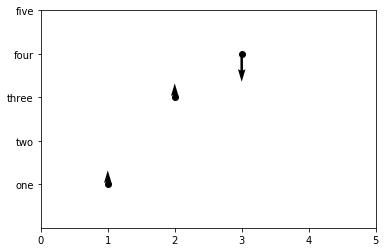

In [181]:
### - Print arrows using quiver. X,Y are arrow locations. U,V indicate directions. Self-scaling.
x=[1.0,2.0,3]
y=[1.0,3.0,4]
u=[0,0,0]
v=[1,1,-2]
fig, ax = plt.subplots()
ax.quiver(x,y,u,v)
ax.scatter(x,y,color='k')
ax.axis([0,5,0,5])
plt.yticks(range(1,6), ['one', 'two', 'three', 'four', 'five' ])
plt.show()